In [ ]:
show_df(c_summary.head(30))

In [ ]:
c_summary.columns

In [ ]:
#Look at any FOD_ID that shows up more than once.
duplicated_ids = c_summary[c_summary.duplicated('FOD_ID', keep=False)]

# Display all rows with duplicated FOD_IDs
show_df(duplicated_ids)

In [ ]:
duplicated_ids["FOD_ID"].value_counts()

In [ ]:
c_summary['FOD_ID'].isna().sum()

In [ ]:
#FOCUS HERE. FOD_ID duplications mean a fire was classified in multiple complexes
c_summary['FOD_ID'].value_counts()

In [ ]:
id1 = c_summary[c_summary["FOD_ID"]==400629554.0]
show_df(id1)

## Begin C_Summary Table Analysis

In [ ]:
c_summary.columns

In [ ]:
len(c_summary)

In [ ]:
c_summary.describe()

In [ ]:
c_summary.info()

In [ ]:
unique_counts = c_summary.nunique()

# Print results nicely
for column, count in unique_counts.items():
    print(f"{column}: {count} ")

In [ ]:
for column in c_summary.columns:
    unique_values = c_summary[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique values ({len(unique_values)}): {unique_values}\n")


In [ ]:
#Print all rows where FOD discovery date does not match CPLX Discovery date
c_summary['CPLX_DISCOVERY_DATE'] = pd.to_datetime(c_summary['CPLX_DISCOVERY_DATE']).dt.date

# Convert FOD_DISCOVERY_DATE to datetime if it's not already
c_summary['FOD_DISCOVERY_DATE'] = pd.to_datetime(c_summary['FOD_DISCOVERY_DATE']).dt.date

# Filter rows where the dates do not match
filtered_rows = c_summary[c_summary['FOD_DISCOVERY_DATE'] != c_summary['CPLX_DISCOVERY_DATE']]

# Display the result
show_df(filtered_rows)

In [ ]:
#Group complexes by year. Make a line plot tracking complex causes over time.
c_summary['CPLX_DISCOVERY_DATE'] = pd.to_datetime(c_summary['CPLX_DISCOVERY_DATE'])

# Extract the year from the discovery date
c_summary['YEAR'] = c_summary['CPLX_DISCOVERY_DATE'].dt.year

causes = c_summary.groupby(['YEAR', 'CPLX_CAUSE'])

# Group by year and cause, then count the number of fires
cause_by_year = c_summary.groupby(['YEAR', 'CPLX_CAUSE']).size().unstack(fill_value=0)


# Plotting
plt.figure(figsize=(12, 6))
cause_by_year.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Number of Fires by Cause (2014-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Cause', labels=['Human (H)', 'Lightning (L)', 'Unknown (U)'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
causes.head()

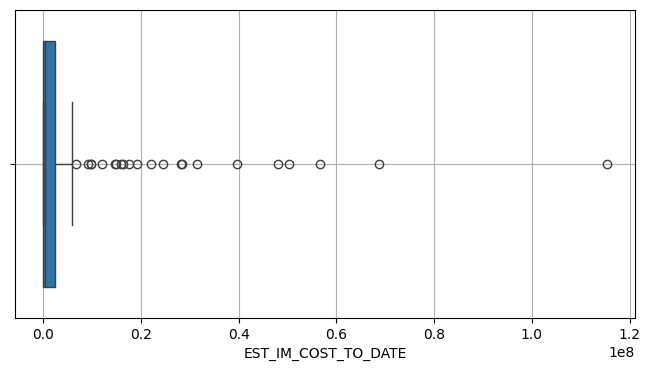

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=latest_costs['EST_IM_COST_TO_DATE'])
#sns.histplot(c_daily['EST_IM_COST_TO_DATE'], bins=4)
#plt.title('Box Plot of EST_IM_COST_TO_DATE')
plt.xlabel('EST_IM_COST_TO_DATE')
plt.grid(True)
plt.show()

In [ ]:
len(c_summary)

In [ ]:
len(c_summary.drop_duplicates())

In [ ]:
show_df(causes)

In [ ]:
#Just take a look at one complex to see what the data looks like
rp_complex = c_summary[c_summary['CPLX_INCIDENT_ID']=="2021_12965990_ROUGH PATCH COMPLEX"]

In [ ]:
#Grouping by IrwinID would give you data for the whole complex.
rp_complex

In [ ]:
#Check to see if any complexes span multiple years

c_summary['CPLX_DISCOVERY_DATE'] = pd.to_datetime(c_summary['CPLX_DISCOVERY_DATE'])

# Extract the year from the 'DISCOVERY_DATE'
c_summary['Year'] = c_summary['CPLX_DISCOVERY_DATE'].dt.year

# Group by 'CPLX_IRWIN_ID' and find the min and max year for each complex
year_range = c_summary.groupby('CPLX_IRWIN_ID')['Year'].agg(['min', 'max'])

# Filter for complexes that span multiple years
complexes_spanning_multiple_years = year_range[year_range['min'] != year_range['max']]

# Display the result
print(complexes_spanning_multiple_years)